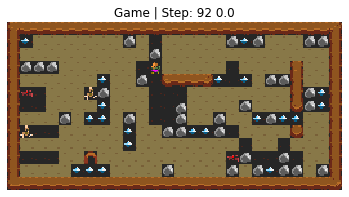

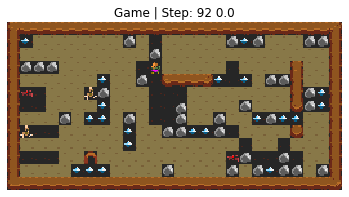

In [66]:
import os

import gym
import gym_gvgai
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from stable_baselines.common.vec_env import DummyVecEnv
#from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines.common.policies import ActorCriticPolicy
from stable_baselines.common.policies import MlpPolicy

from stable_baselines import A2C
from stable_baselines.bench import Monitor
from stable_baselines import SAC
from stable_baselines.common.callbacks import EvalCallback
from stable_baselines.common import make_vec_env
from stable_baselines import PPO2
from stable_baselines import TRPO


def show_state(env, step=0, name="", info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (name,step,info))
    plt.axis('off')
              
    display.clear_output(wait=True)
    display.display(plt.gcf())

    
env = gym.make('gvgai-boulderdash-lvl4-v0')
model = TRPO(MlpPolicy,env,verbose=1)
model.load("TRPO_boulder")

obs = env.reset()
score = 0
for i in range(2500):
    show_state(env, i, "Game", str(score))
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    score += rewards 
    if(dones):
        break